<a href="https://colab.research.google.com/github/SHREYA-A-J/AIML_LAB/blob/main/LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

data = pd.read_csv('/content/sample_data/Sales.csv.csv')

In [17]:
x=data['GrLivArea']
y=data['SalePrice']

x=(x-x.mean()) /x.std()
x=np.c_[np.ones(x.shape[0]), x]

In [18]:
alpha = 0.01
iterations = 2000
m = y .size
np.random.seed(123)
theta = np.random.rand(2)

In [23]:
def gradient_descent(x,y,theta,iterations,alpha):
  past_costs=[]
  past_thetas=[theta]
  for i in range(iterations):
    prediction = np.dot(x,theta)
    error=prediction-y
    cost=1/(2*m) * np.dot(error.T, error)
    past_costs.append(cost)
    theta=theta-(alpha*(1/m)*np.dot(x.T,error))
    past_thetas.append(theta)
  return past_thetas,past_costs

past_thetas,past_costs=gradient_descent(x,y,theta,iterations,alpha)
theta=past_thetas[-1]

print("Gradient Descent: {:.2f},{:.2f}".format(theta[0],theta[1]))


Gradient Descent: 180921.20,56294.90


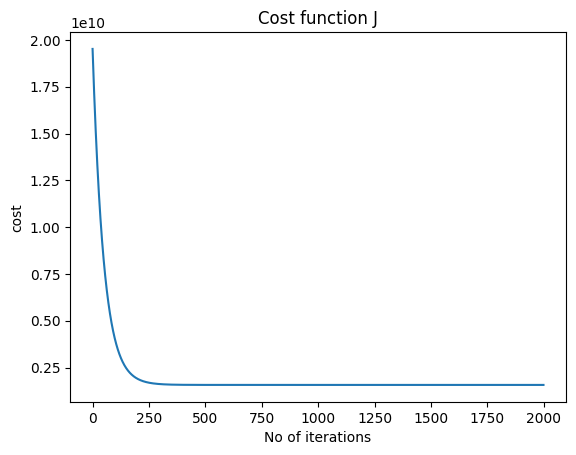

In [24]:
plt.title('Cost function J')
plt.xlabel('No of iterations')
plt.ylabel('cost')
plt.plot(past_costs)
plt.show()

In [33]:
!pip install imagemagick
#Import the matplotlib.animation module and rename it to animation
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation #Import the FuncAnimation object from matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np


ERROR: Could not find a version that satisfies the requirement imagemagick (from versions: none)
ERROR: No matching distribution found for imagemagick


In [34]:
def animate(i):
  x=np.linspace(-5,20,1000)
  y=past_thetas[i][1]*x+past_thetas[i][0]
  line.set_data(x,y)
  annotation.set_text('Cost = %.2f e10' % (past_costs[i]/100000000))
  return line,annotation

anim=FuncAnimation(fig, animate, init_func=init,frames=300,interval=0,blit=True)
anim.save('animation.gif',writer='imagemagick',fps=30)


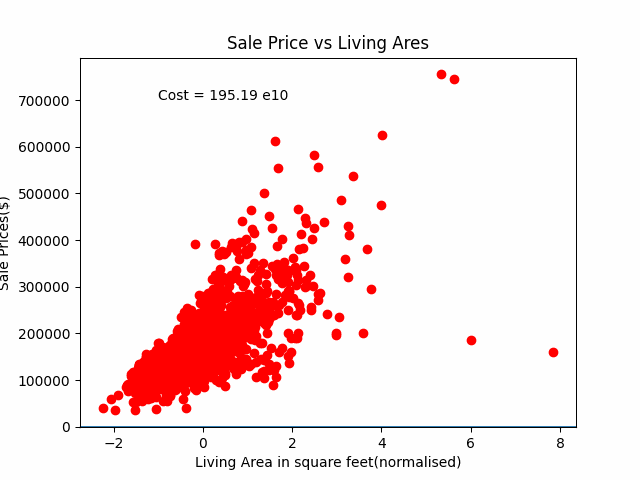

In [35]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))